In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/GDDA708/Assignment2_final/

/content/drive/MyDrive/GDDA708/Assignment2_final


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [23]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [24]:
# Load the dataset
df = pd.read_csv('insurance.csv')


In [25]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Dropping unwanted columns
df = df.drop(columns=['index'])

In [27]:
#checking for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [28]:
# Specify the numerical columns
numerical_columns = ['charges', 'age', 'bmi', 'children']



In [29]:
# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Keep rows where Z-scores are less than 3
df = df[(z_scores < 3).all(axis=1)]

In [30]:
#Checking data frame shape after removing outliers
df.shape

(1309, 7)

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [33]:
# Identifying categorical columns to encode
categorical_columns = ['smoker', 'region','sex']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows to confirm
df.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,16884.92400,True,False,False,True,False
1,18,33.770,1,1725.55230,False,False,True,False,True
2,28,33.000,3,4449.46200,False,False,True,False,True
3,33,22.705,0,21984.47061,False,True,False,False,True
4,32,28.880,0,3866.85520,False,True,False,False,True


In [34]:
# Separating target and features
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

In [35]:
X.head()

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,True,False,False,True,False
1,18,33.770,1,False,False,True,False,True
2,28,33.000,3,False,False,True,False,True
3,33,22.705,0,False,True,False,False,True
4,32,28.880,0,False,True,False,False,True


In [36]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [37]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape

(1047, 8)

In [39]:
X_test.shape

(262, 8)

In [40]:
y_train.shape

(1047,)

In [ ]:
y_test.shape

(262,)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:

#Defining the moedl
linear_model =LinearRegression()


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Linear Regression Testing Mean Squared Error: 30444091.526395816
Linear Regression Testing R^2 Score: 0.7787373616773112


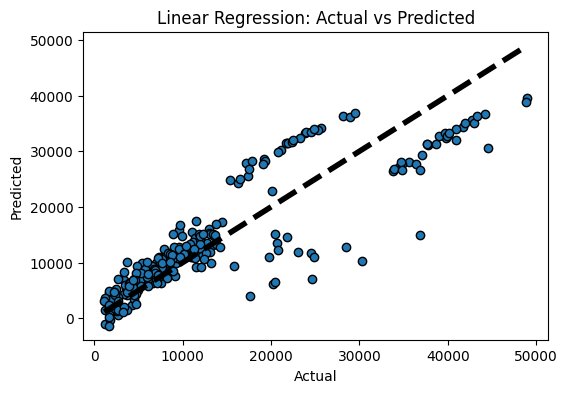

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Initializing the model
linear_model = LinearRegression()

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting with the grid search (training data)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Predict on the test set
best_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
best_test_mse = mean_squared_error(y_test, best_test_pred)
best_test_r2 = r2_score(y_test, best_test_pred)

print(f"Linear Regression Testing Mean Squared Error: {best_test_mse}")
print(f"Linear Regression Testing R^2 Score: {best_test_r2}")

# Visualize the predictions vs actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, best_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error


score_method = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 5-Fold Cross-Validation using the best model from GridSearchCV
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring=score_method, n_jobs=-1, verbose=2)

# Convert negative MSE scores to positive MSE values
cv_mse_scores = -cv_scores

# Print out the cross-validation MSE results
print("Cross-Validation Mean Squared Errors:", cv_mse_scores)
print("Average Cross-Validation MSE:", cv_mse_scores.mean())


# Calculate and print the cross-validation R² scores
cv_r2_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1, verbose=2)
print("Cross-Validation R^2 Scores:", cv_r2_scores)
print("Average Cross-Validation R^2 Score:", cv_r2_scores.mean())


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Cross-Validation Mean Squared Errors: [43555288.16887702 37881086.08050545 32090588.90786279 32443128.06691492
 31959034.24540686]
Average Cross-Validation MSE: 35585825.093913406
Cross-Validation R^2 Scores: [0.70969736 0.71402777 0.77031383 0.76123725 0.75157346]
Average Cross-Validation R^2 Score: 0.7413699332161043


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
